# Exploration of GABA Receptors

In [1]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)


importing IPython notebook from Global_Parameters

In [4]:
f_win.order().tail()

CST2        0.42
C16orf13    0.43
GABRD       0.46
SEMA5B      0.48
MIR4508     0.52
Name: fraction overexpressed\n(detrended), dtype: float64

In [5]:
gabr = [g for g in rna_df.index if g.startswith('GABR')]
f = dx_rna.ix[gabr].dropna()
f.join(f_win).sort(f_win.name)

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
GABRA2,141,654,0.22,1.59e-50,-0.31
GABRA4,145,645,0.22,1.39e-46,-0.27
GABRB1,201,629,0.32,8.11e-20,-0.16
GABRP,248,684,0.36,6.25e-13,-0.15
GABRB3,218,684,0.32,1.29e-21,-0.12
GABRG1,189,635,0.30,6.76e-25,-0.12
GABRG3,273,632,0.43,7.10e-04,-0.12
GABRA3,333,602,0.55,1.02e-02,-0.10
GABRA5,281,617,0.46,2.96e-02,-0.09
GABRB2,245,678,0.36,4.92e-13,-0.06


# Need to pull GTEX out into module

In [2]:
meta = pd.read_table('/cellar/users/agross/Data/DiffExp/GTEX/GTEx_Data_V4_Annotations_SampleAttributesDS.txt',
                     index_col=0)
gtex_pat = pd.read_table('/cellar/users/agross/Data/DiffExp/GTEX/GTEx_Data_V4_Annotations_SubjectPhenotypes_DS.txt',
                     index_col=0)

gtex = pd.read_table('/cellar/users/agross/Data/DiffExp/GTEX/GTEx_Analysis_2014-01-17_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct',
                     skiprows=2, index_col=[0,1])
gtex.index = gtex.index.get_level_values(1)
gtex = np.log2(gtex)

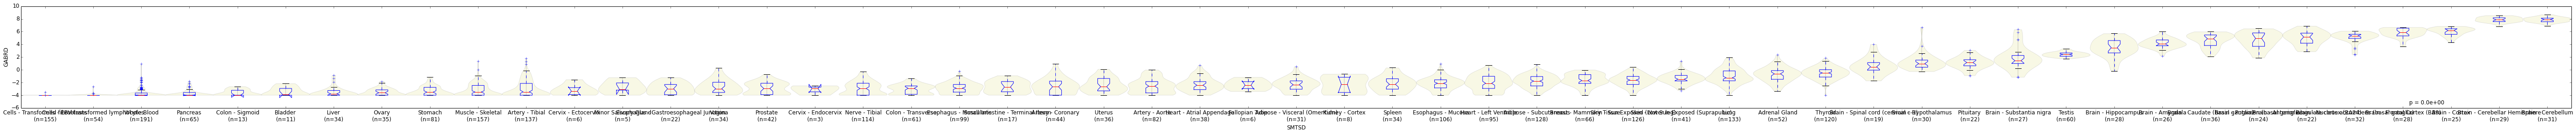

In [3]:
fig, ax = subplots(figsize=(100,4))
violin_plot_pandas(meta['SMTSD'], gtex.ix['GABRD'].dropna().clip_lower(-4), ax=ax,
                   order=gtex.ix['GABRD'].groupby(meta['SMTSD']).median().order().index)

In [6]:
mm =  gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median()
mm = mm.clip_lower(-10)

In [83]:
d = gtex.ix[gabr].clip_lower(-7).ix[:, ti(meta['SMTSD'] == 'Testis')].dropna(1)
o = list(d.median(1).order()[::-1].index)

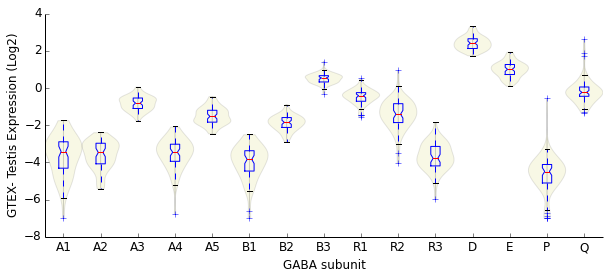

In [85]:
o = ['GABRA1','GABRA2', 'GABRA3', 'GABRA4', 'GABRA5',
     'GABRB1', 'GABRB2', 'GABRB3',
     'GABRR1', 'GABRR2', 'GABRR3',
     'GABRD','GABRE','GABRP','GABRQ']

fig, ax = subplots(figsize=(10,4))
violin_plot_series(d.T.stack(), ax=ax, order=o, ann=None)
ax.set_xticklabels([c[4:] for c in o])
ax.set_xlabel('GABA subunit')
ax.set_ylabel('GTEX- Testis Expression (Log2)')
prettify_ax(ax)
fig.savefig(FIGDIR + 'Fig_S6.pdf')

In [57]:
mm.rank(1, ascending=False)['GABRD'].order()

SMTSD
Brain - Anterior cingulate cortex (BA24)      1
Brain - Frontal Cortex (BA9)                  1
Brain - Cortex                                1
Brain - Cerebellum                            1
Brain - Cerebellar Hemisphere                 1
Brain - Caudate (basal ganglia)               1
Brain - Amygdala                              1
Brain - Putamen (basal ganglia)               1
Testis                                        1
Brain - Nucleus accumbens (basal ganglia)     2
Adrenal Gland                                 2
Brain - Spinal cord (cervical c-1)            2
Skin - Not Sun Exposed (Suprapubic)           3
Skin - Sun Exposed (Lower leg)                3
Thyroid                                       3
Lung                                          3
Muscle - Skeletal                             3
Adipose - Subcutaneous                        3
Whole Blood                                   3
Brain - Hippocampus                           3
Adipose - Visceral (Omentum)      

In [9]:
mm.ix['Testis'].order()

Description
GABRP    -4.49
GABRB1   -3.84
GABRR3   -3.78
GABRA2   -3.47
GABRA4   -3.45
GABRA1   -3.42
GABRG1   -2.89
GABRG2   -2.31
GABRB2   -1.85
GABRA5   -1.53
GABRR2   -1.41
GABRA6   -1.35
GABRA3   -0.81
GABRR1   -0.42
GABRQ    -0.24
GABRB3    0.54
GABRG3    0.96
GABRE     1.00
GABRD     2.41
Name: Testis, dtype: float64

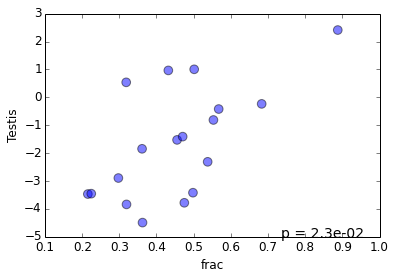

In [19]:
series_scatter(dx_rna.frac.ix[gabr],
               gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median().ix['Testis'])

In [20]:
gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median().ix['Brain - Cerebellum'].order()

Description
GABRP         -8.19
GABRR3        -7.55
GABRR1        -4.34
GABRQ         -3.09
GABRR2        -3.07
GABRA5        -2.25
GABRE         -1.25
GABRG3        -1.00
GABRA4        -0.76
GABRA3        -0.44
GABRB1        -0.02
GABRA2         1.51
GABRG1         2.65
GABRB3         3.11
GABRG2         4.51
GABRB2         4.74
GABRA1         4.98
GABRA6         6.74
GABRD          7.90
Name: Brain - Cerebellum, dtype: float64

In [21]:
gtex.ix[gabr, ti(meta['SMTSD'] == 'Testis')].T.corr().ix['GABRD'].order()

Description
GABRA4        -0.37
GABRP         -0.23
GABRA6        -0.16
GABRG3        -0.11
GABRA1        -0.04
GABRR2        -0.03
GABRB1        -0.01
GABRA2         0.04
GABRR3         0.04
GABRQ          0.06
GABRG1         0.07
GABRG2         0.18
GABRB2         0.22
GABRB3         0.33
GABRR1         0.35
GABRA5         0.35
GABRA3         0.47
GABRE          0.57
GABRD          1.00
Name: GABRD, dtype: float64

In [22]:
import seaborn as sns

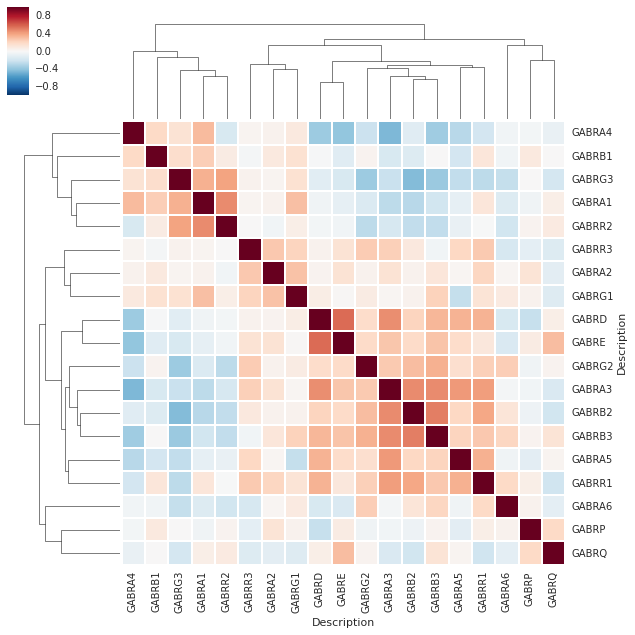

In [23]:
sns.clustermap(gtex.ix[gabr, ti(meta['SMTSD'] == 'Testis')].T.corr())

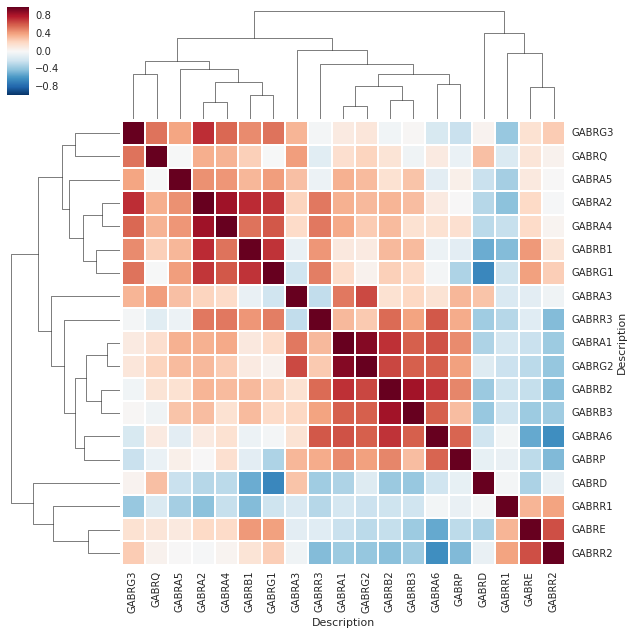

In [24]:
bella = ti(meta['SMTSD'].dropna().str.contains('Cerebellum'))
sns.clustermap(gtex.ix[gabr, bella].T.corr())

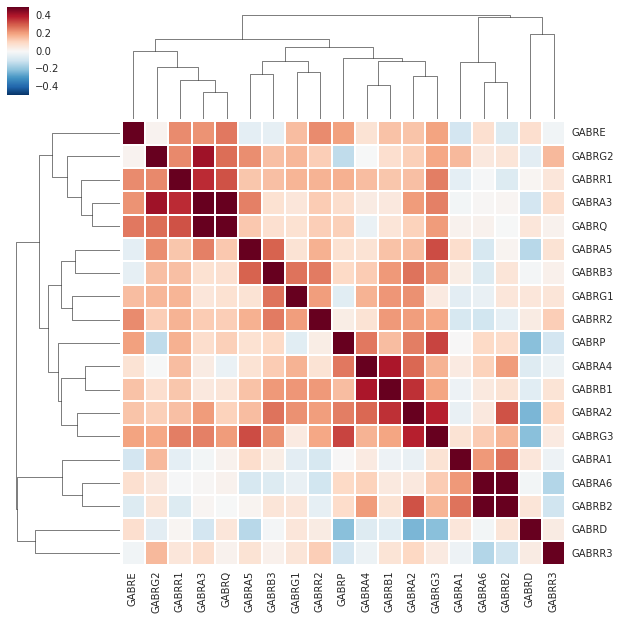

In [25]:
sns.clustermap(dx.ix[gabr].T.corr().clip(-.5,.5))